<a href="https://colab.research.google.com/github/urek01/Research-Methods-for-Data-Science-with-Python/blob/master/COVID_invasive_and_noninvasive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FM.csv to FM.csv


In [3]:
data = pd.read_csv('FM.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.dtypes

Here 0 represents male and 1 represents female

In [ ]:
df.isnull().sum()
df.isna().sum()

In [ ]:
df.drop('DeathInterval',axis=1,inplace=True)

In [ ]:
for col_names in df.columns:
  mean_column = df[col_names].mean()
  median_column = df[col_names].median()
  print(col_names," = ",mean_column," ",median_column)

In [ ]:
grouped = df.groupby(df.Sex)
df_M = grouped.get_group(0)

In [ ]:
grouped = df.groupby(df.Sex)
df_F = grouped.get_group(1)

In [ ]:
df_M.isnull().sum()

In [ ]:
df_F.isnull().sum()

In [ ]:
df.to_csv('Record.csv')
files.download('Record.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_M.to_csv('Male_Record.csv')
files.download('Male_Record.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_F.to_csv('Female_Record.csv')
files.download('Female_Record.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df["LDH"], kde = True, color ='red', bins = 60)

In [ ]:
for col_names in df.columns:
  if df[col_names].isnull().sum() != 0:
    df[col_names].fillna(df[col_names].median(), inplace = True)

In [ ]:
for col_names in df_M.columns:
  mean_column = df_M[col_names].mean()
  median_column = df_M[col_names].median()
  print(col_names," = ",mean_column," ",median_column)

In [ ]:
for col_names in df_M.columns:
  if df_M[col_names].isnull().sum() != 0:
    df_M[col_names].fillna(df_M[col_names].median(), inplace = True)

In [ ]:
for col_names in df_F.columns:
  if df_F[col_names].isnull().sum() != 0:
    df_F[col_names].fillna(df_F[col_names].median(), inplace = True)
    

In [ ]:
df.to_csv("Record_Formatted.csv")
files.download("Record_Formatted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_M.to_csv("Male_Record_Formatted.csv")
files.download("Male_Record_Formatted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_F.to_csv("Female_Record_Formatted.csv")
files.download("Female_Record_Formatted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_M.drop('Sex',axis=1,inplace=True)
df_F.drop('Sex',axis=1,inplace=True)


In [ ]:
a = df_M.corr(method='pearson')
b = df_F.corr(method='pearson')
c = df.corr(method='pearson')

In [ ]:
a.to_csv('corr_male.csv')
files.download('corr_male.csv')
b.to_csv('corr_female.csv')
files.download('corr_female.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
c.to_csv('corr.csv')
files.download('corr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_drop=df.drop(['BPmax ','BPmin ','Pr ','SPo2 ','RBC','PLT','MCV','MCHC','PO2','ALKP','LDH'],axis=1,inplace=False)

In [6]:
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [66]:
X_data = invasive[invasive.columns.drop('Outcome')]
Y_data = invasive['Outcome']

In [67]:
a=[]
from sklearn import metrics
for i in range(1, 100):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)
  clf.fit(X_train, Y_train)
  y_pred=clf.predict(X_test)
  a.append(metrics.accuracy_score(Y_test, y_pred))
#  print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
#  print(confusion_matrix(Y_test,y_pred))

In [69]:
a = pd.DataFrame(a)
print(a.mean(), a.std())

0    0.739762
dtype: float64 0    0.028362
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


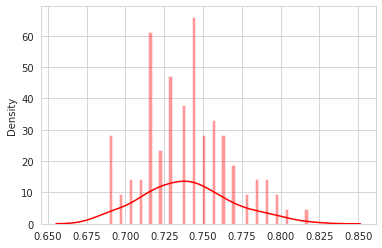

In [70]:
sns.set_style('whitegrid')
sns.distplot(a, kde = True, color ='red', bins = 60)

In [71]:
feature_importance = pd.DataFrame(clf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importance

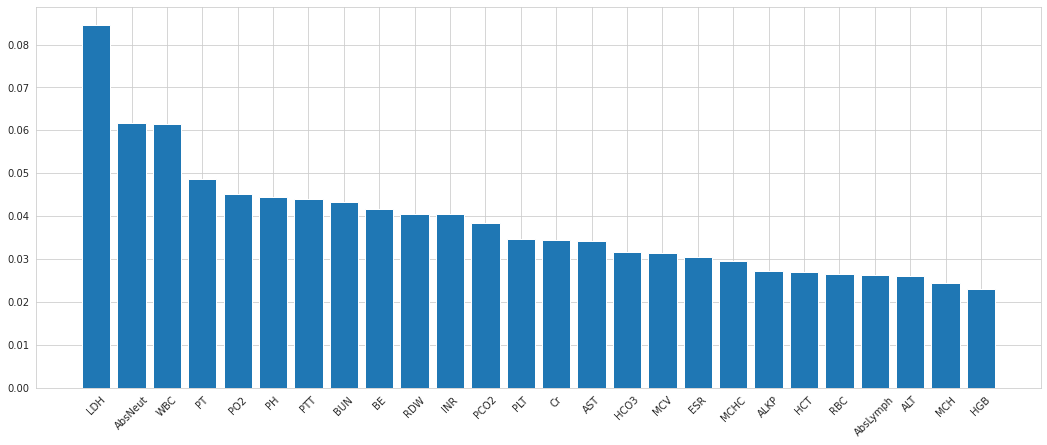

In [72]:
f, ax = plt.subplots(figsize=(18,7))
plt.bar(feature_importance.index,feature_importance['importance'].values)
ax.set_xticklabels(labels=feature_importance.index, rotation=45)
plt.show()

In [56]:
non_invasive = pd.DataFrame(df, columns = ['Outcome','Age','Sex','BPmax ','BPmin ','Pr ','RR ','T ','SPo2 ','HTN','DM','CVD'])
non_invasive.head()

,Outcome,Age,Sex,BPmax,BPmin,Pr,RR,T,SPo2,HTN,DM,CVD
0,1,38,0,105,70,110,19,37.0,88,0,0,0
1,1,71,0,130,80,70,17,37.0,91,0,1,1
2,1,50,0,110,70,80,20,37.3,98,0,0,0
3,0,80,0,111,80,76,21,37.0,60,1,1,1
4,0,64,0,125,88,90,20,37.0,20,1,1,0


In [50]:
invasive = pd.DataFrame(df, columns = df.columns.drop(['Age','Sex','BPmax ','BPmin ','Pr ','RR ','T ','SPo2 ','HTN','DM','CVD']))
invasive.head()

,WBC,AbsNeut,AbsLymph,RBC,HGB,HCT,PLT,MCV,MCH,MCHC,RDW,ESR,PT,PTT,INR,PH,PCO2,PO2,HCO3,BE,BUN,Cr,AST,ALT,ALKP,LDH,Outcome
0,8.10,6.8850,0.8100,4.84,13.2,39.9,143,82.44,27.27,33.08,13.8,27.0,13.7,33.0,1.10,7.418,35.9,35.6,22.7,-1.8,11,1.13,36.4,20.3,152.0,655.0,1
1,3.60,2.5200,1.0800,4.06,10.8,33.4,169,82.27,26.60,32.34,13.8,24.0,13.0,33.0,1.00,7.378,39.1,19.1,22.5,-2.2,13,1.19,48.9,46.2,155.0,389.0,1
2,15.91,14.6372,0.9546,4.87,13.7,42.4,207,87.06,28.13,32.31,15.0,5.0,15.4,30.0,1.30,7.395,46.9,27.6,28.1,2.3,18,0.95,18.3,61.7,276.0,361.0,1
3,20.79,19.3347,0.4158,5.10,14.8,42.4,296,83.10,29.00,34.90,13.3,67.0,15.9,55.0,1.74,7.240,45.1,10.0,18.7,-8.5,46,2.20,37.0,23.0,234.0,635.0,0
4,12.90,11.8680,0.7740,5.16,16.3,46.7,191,90.50,31.60,34.90,12.8,59.0,14.9,54.0,1.53,7.430,53.7,23.9,35.7,9.7,36,1.60,115.5,94.3,182.0,1570.0,0
